# Reporte 7

**Lectura:**

El artículo desarrollado identifica que existe una brecha en términos económicos, de acceso a servicios públicos (como educación y salud), entre las personas de categoría de alta pobreza respecto de otros de menor pobreza. Por tanto, la pregunta de investigación que resulta de dicho planteamiento es ¿Cuál es el impacto a largo plazo para las personas mudarse a vecindarios de categoría de menor pobreza? 

Para responder dicha pregunta, los autores usan el experimento Moving to Opportunity (MTO), que fue organizado por el Departamento de Vivienda y Desarrollo Urbano de Estados Unidos en 1990. En este, se entregaban tickets que ofrecían un subsidio de vivienda para que las familias, de vecindarios de menor pobreza, pudieran vivir en vecindarios con menor índice de pobreza. Cabe precisar que, para garantizar el resultado del experimento, los tickets fueron entregados de forma aleatoria. Asimismo, se enfocar en determinar el impacto en niños menores de 13 años, para poder identificar el impacto que tenía en el largo plazo. Entonces, se plantearon dos hipótesis para responder dichas preguntas. La primera, sostenía que mudarse a un área de menor pobreza mejoraría los resultados económicos a largo plazo para los niños que eran pequeños. La segunda, que los efectos a largo plazo de mudarse a un área de menor pobreza disminuirían con la edad del niño en el momento de la mudanza.

Es importante destacar que el presente texto presenta variadas fortalezas. Entre dichas fortalezas, se encuentra la capacidad de los autores de refutar sobre los estudios anteriores respecto al impacto del experimento MTO (Moving to Opportunity). Esto demuestra la capacidad de extraer apropiadamente conocimientos correctos sobre la pregunta del artículo. De esta manera, la preocupación de los autores por ir más allá de los datos otorgados por unos primeros estudios muestra el nivel de exigencia y superación de estos autores. Otra fortaleza a mencionar es la importancia de que los datos obtenidos fueran estudiados por más de un autor debido a que brinda certeza con respecto a la entrega de datos al público, mostrando así su preocupación por ser un documento transparente. Además, esta investigación estuvo respaldada económicamente por una universidad tan prestigiosa como lo es Harvard que muestra el alto nivel de este texto y el alto nivel de confianza que se le otorga a este texto. A pesar de que, no exista presencia de debilidades a la vista, se puede mencionar que podría abarcar y especificar aún más acerca de las posibles consecuencias futuras que económicamente implica que estos niños sigan viviendo en casas con la mayor tasa de pobreza, lo cual podría ser mencionado primero desde efectos económicos a Estados Unidos y más adelante como un efecto macroeconómico que afectaría a otras naciones.

Asimismo, es preciso recalcar lo importante contribución de los autores respecto a un tema primordial puesto que han demostrado su preocupación ante los niños con menos posibilidades económicas y como ante esta problemática la existencia de un proyecto como MTO es capaz de modificar la vida y las posibilidades de dichos nichos. Dichos autores han contribuido en la corrección de estudios del experimento MTO, lo cual, marca un gran paso en el mejoramiento de niños afectados por MTO. El tema del cual se ha basado el artículo es fundamental para las futuras bases de la economía en su respectivo país pues este tipo de cambio de vivienda en los niños ha mostrado ser capaz de fomentar e incurrir a futuros cambios económicos y es importante una buena toma de decisiones en este tipo de proyectos que son capaces de afectar poblaciones a gran medida y a vidas futuras.

Entonces, una forma de seguir con las preguntas del autor, sería poder identificar si este mismo podría realizarse en países de Latinoamérica, donde los estándares de pobreza podrían variar de manera significativa. Es decir, las condiciones de pobreza en países desarrollados son vasto diferentes respecto del caso latinoamericano, por lo que el impacto a largo plazo podría estar determinado por otras variables, no necesariamente del vecindario de mayor pobreza. En este sentido, profundizar en dicho estudio sería recomendable. Asimismo, también resultaría conveniente evaluar el impacto que tiene en niños menores a los estudiados, para identificar si podría haber una correlación entre los efectos a largo plazo y la edad en la que los niños se mudan (partiendo de que se mudarían a mejores vecindarios). Todo ello, permitiría comprender mejor el estudio y ampliar lo ya desarrollado por los autores. 


# Parte 2

**CÓDIGO REALIZADO CON MARA ALEJANDRA BOCETA PALOMINO**

In [232]:
# Import seaborn
import seaborn as sns

In [233]:
import numpy as np 

In [234]:
import pandas as pd 

In [235]:
import statsmodels.api as sm 

In [236]:
import statsmodels.formula.api as smf 

In [237]:
from itertools import combinations 

In [238]:
pip install plotnine

Note: you may need to restart the kernel to use updated packages.


In [239]:
import plotnine as p

In [240]:

# Apply the default theme
sns.set_theme()

# Load an example dataset
data = pd.read_csv('https://github.com/matheusfacure/python-causality-handbook/raw/master/causal-inference-for-the-brave-and-true/data/online_classroom.csv')
print(data.shape)
data.head()

(323, 10)


,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000


In [241]:
# creado una columna extra para clasificar
data2 = (data
 .assign(class_format = np.select(
     [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
     ["online", "blended"],
     default="face_to_face" #create a new variable
 ))) #group by the new variable (treatments)

In [242]:
data2

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,face_to_face
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,face_to_face
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,blended
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,blended
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,online
...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,blended
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,online
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,online
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,online


In [243]:
data2.groupby(["class_format"]).mean() #get the exam's mean

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
class_format,,,,,,,,,,
blended,0.550459,0.217949,0.102564,0.025641,0.012821,0.012821,0.628205,0.0,1.0,77.093731
face_to_face,0.633333,0.202020,0.070707,0.000000,0.010101,0.000000,0.717172,0.0,0.0,78.547485
online,0.542553,0.228571,0.028571,0.014286,0.028571,0.000000,0.700000,1.0,0.0,73.635263


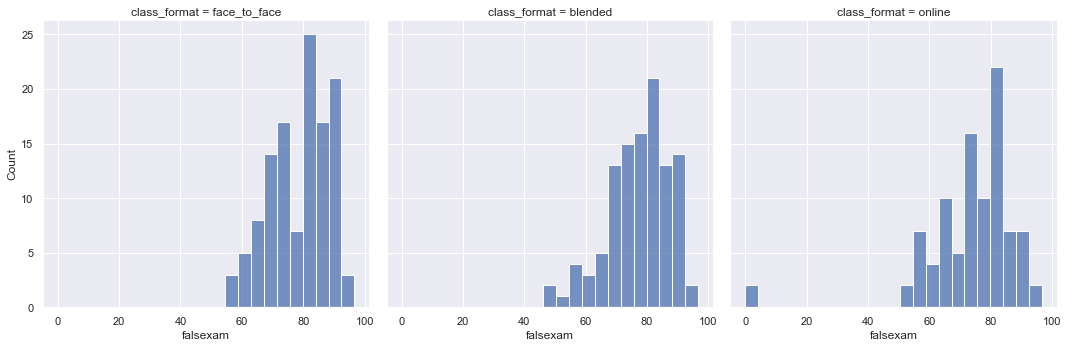

In [244]:
sns.displot(data2, x="falsexam", col="class_format")

**CREACIÓN DE LA VARIABLE DUMMIE**

In [245]:
data3 = pd.get_dummies(data2, prefix= "class_format")

In [246]:
data3.head ()

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1


In [247]:
data3

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1,0,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,1,0,0
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,0,0,1
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,0,0,1
321,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,83.29997,0,0,1


**ANÁLISIS DE BLENDED FORMAT**

limpiamos la base para quedarnos únicamente con los datos que analizaremos para el blended format

In [248]:
datable = data3.drop(data3[data3['class_format_blended']<1].index)
datable

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
2,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,83.37000,1,0,0
3,1,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,90.01994,1,0,0
6,1,1.0,0.0,0.0,0.0,0.0,0.0,0,1.0,78.40000,1,0,0
13,1,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,76.64000,1,0,0
15,0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,66.64000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,73.37000,1,0,0
310,1,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,69.96000,1,0,0
315,1,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,88.31000,1,0,0
318,0,0.0,0.0,0.0,0.0,0.0,1.0,0,1.0,68.36000,1,0,0


Graficamos la modalidad blended:

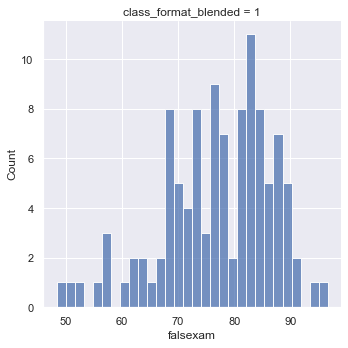

In [249]:
sns.displot(datable, x="falsexam", col="class_format_blended",bins=30)

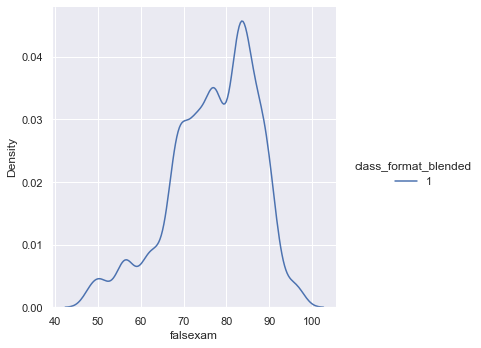

In [250]:
sns.displot(datable, x="falsexam", hue="class_format_blended", kind="kde", bw_adjust=.5)

**ANÁLISIS DE ONLINE**

limpiamos la base para quedarnos únicamente con los datos que analizaremos para el online:

In [251]:
dataon = data3.drop(data3[data3['class_format_online']<1].index)
dataon

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1
5,0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,88.34996,0,0,1
9,0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,73.37000,0,0,1
10,1,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,83.30000,0,0,1
16,1,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,80.05000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,70.00000,0,0,1
309,0,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,0.00000,0,0,1
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,0,0,1
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,0,0,1


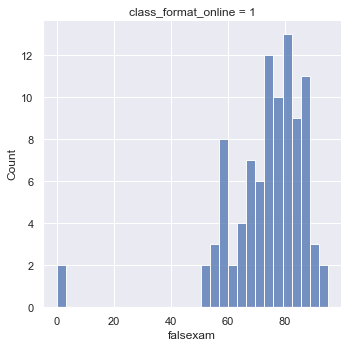

In [252]:
sns.displot(dataon, x="falsexam", col="class_format_online",bins=30)

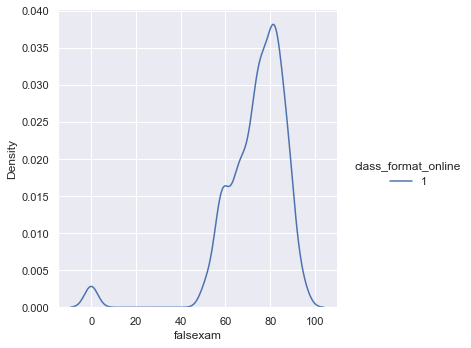

In [253]:
sns.displot(dataon, x="falsexam", hue="class_format_online", kind="kde", bw_adjust=.5)

**ANÁLISIS DE FACE TO FACE**

limpiamos la base para quedarnos únicamente con los datos que analizaremos para el face to face:

In [254]:
datafa = data3.drop(data3[data3['class_format_face_to_face']<1].index)
datafa

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
7,1,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,90.00000,0,1,0
8,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,88.31000,0,1,0
11,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,86.64000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,90.00000,0,1,0
313,0,0.0,1.0,0.0,0.0,0.0,0.0,0,0.0,61.68000,0,1,0
314,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,73.37000,0,1,0
316,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,91.65000,0,1,0


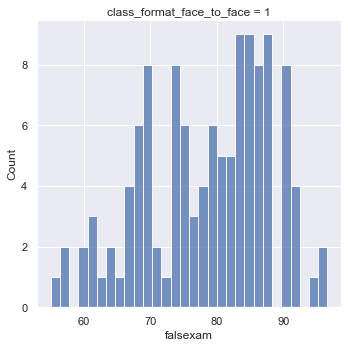

In [255]:
sns.displot(datafa, x="falsexam", col="class_format_face_to_face",bins=30)

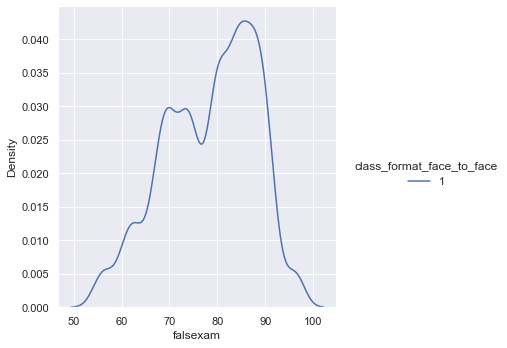

In [256]:
sns.displot(datafa, x="falsexam", hue="class_format_face_to_face", kind="kde", bw_adjust=.5)

Entonces, ¿Qué pasa si vemos todos los gráficos comparados?

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam
class_format,,,,,,,,,,
blended,0.550459,0.217949,0.102564,0.025641,0.012821,0.012821,0.628205,0.0,1.0,77.093731
face_to_face,0.633333,0.202020,0.070707,0.000000,0.010101,0.000000,0.717172,0.0,0.0,78.547485
online,0.542553,0.228571,0.028571,0.014286,0.028571,0.000000,0.700000,1.0,0.0,73.635263


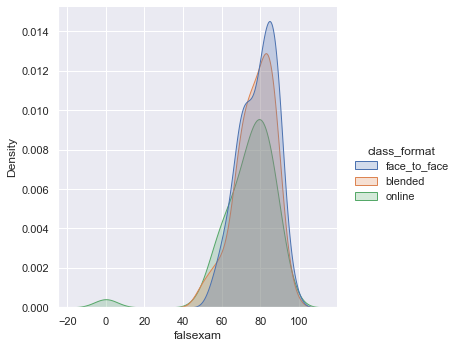

In [258]:
sns.displot(data2, x="falsexam", hue="class_format", kind="kde", fill=True)
data2.groupby(["class_format"]).mean() #get the exam's mean

**EXPLICACIÓN DE LA DIFERENCIA DE HISTOGRAMAS:**

Entonces, evidenciamos que los tres grupos tienen un promedio similar, en donde el grupo tiene una cantidad den notas homogéneas, en el sentido de que el gráfico de densidad nos muestra que los gráficos son empinados y tiene un rango cercano de notas donde se acumula la población (entre 40 y 100). Asimismo, podemos ver que la cantidad de personas face_to_face posee una mayor cantidad de alumnos, seguido por blnede y finalmente online. Asimismo, el único grupo que posee valores fuera del rango común, es de "online", ya que acumula personas cerca del "cero". 

**PARTE: Difference-in-means estimator.**

1. Creamos un nuevo dataser donde se incluya unicamente face-to-face y online lessons

In [268]:
from scipy import stats

In [269]:
from scipy.stats import norm

In [270]:
import statsmodels.api as sm

In [271]:
import patsy

In [286]:
pip install SyncRNG

In [287]:
from SyncRNG import SyncRNG

In [273]:
import patsy

In [274]:
%matplotlib inline

In [275]:
import matplotlib

In [276]:
import matplotlib.mlab as mlab

In [277]:
import matplotlib.pyplot as plt

In [288]:
pip install pyreadr

Note: you may need to restart the kernel to use updated packages.


In [289]:
import pyreadr

In [290]:
import seaborn as sns

In [291]:
import random

In [292]:
import string

In [293]:
import warnings

In [294]:
warnings.filterwarnings('ignore')

In [297]:
# Read in data
data = pd.read_csv( "https://docs.google.com/uc?id=1kSxrVci_EUcSr_Lg1JKk1l7Xd5I9zfRC&export=download" )
n = data.shape[0]

# Treatment: does the the gov't spend too much on "welfare" (1) or "assistance to the poor" (0)
treatment = "w"

# Outcome: 1 for 'yes', 0 for 'no'
outcome = "y"

# Additional covariates
covariates = ["age", "polviews", "income", "educ", "marital", "sex"]
data

,X,y,w,age,polviews,income,educ,marital,sex
0,1,0,0,28,4,11,14,5,1
1,2,1,0,54,6,12,16,2,2
2,3,1,0,44,2,12,16,5,2
3,6,0,0,47,1,5,10,4,1
4,7,0,1,19,4,9,10,5,2
...,...,...,...,...,...,...,...,...,...
28648,36497,0,0,62,5,12,16,1,1
28649,36498,1,0,66,7,9,12,2,2
28650,36499,0,1,54,3,11,12,4,2
28651,36500,0,0,57,3,6,16,3,2


In [299]:
# Only valid in the randomized setting. Do not use in observational settings.
Y = data.loc[ : , outcome ].copy()
W = data.loc[ : , treatment ].copy()
ate_est = Y[ W == 1 ].mean() - Y[ W == 0 ].mean()
ate_se = np.sqrt(( Y[ W == 1 ].var() / (W == 1).sum() ) + ( Y[ W == 0 ].var() / (W == 0).sum() ))
ate_tstat = ate_est / ate_se
ate_pvalue = 2* norm.cdf( 1 - abs( ate_est / ate_se ) )
ate_results = pd.DataFrame( { "estimate" : [ate_est], 
               "std_error" : [ate_se], 
               "t_stat" : [ate_tstat], 
               "pvalue" : [ate_pvalue] } )
ate_results

,estimate,std_error,t_stat,pvalue
0,-0.347116,0.004896,-70.903029,0.0


Eliminamos todos los valores 1, que corresponde a que sí forman parte de class_format_bended:

In [453]:
import pandas as pd

In [454]:
data4 = data3.drop(data3[data3["class_format_blended"]==1].index)
data4

,gender,asian,black,hawaiian,hispanic,unknown,white,format_ol,format_blended,falsexam,class_format_blended,class_format_face_to_face,class_format_online
0,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,63.29997,0,1,0
1,1,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,79.96000,0,1,0
4,1,0.0,0.0,0.0,0.0,0.0,1.0,1,0.0,83.30000,0,0,1
5,0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,88.34996,0,0,1
7,1,1.0,0.0,0.0,0.0,0.0,0.0,0,0.0,90.00000,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,91.65000,0,1,0
317,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,84.99000,0,1,0
319,1,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,70.05000,0,0,1
320,0,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,66.69000,0,0,1


Ahora separamos el nuevo dataset seleccionando únicamente los grupos face to face y online

In [374]:
data5 = data4.drop(data4.columns[[0,1,2,3,4,5,6,7,8,10]], axis='columns')

In [375]:
data5

,falsexam,class_format_face_to_face,class_format_online
0,63.29997,1,0
1,79.96000,1,0
4,83.30000,0,1
5,88.34996,0,1
7,90.00000,1,0
...,...,...,...
316,91.65000,1,0
317,84.99000,1,0
319,70.05000,0,1
320,66.69000,0,1


**PROMEDIO DE ONLINE LESSONS Y FACE_TO_FACE**

In [409]:
data7=data2.groupby(["class_format"]).mean() #get the exam's mean
data7 = data7.drop("blended")
data7 = data7.drop(data7.columns[[0,1,2,3,4,5,6,7,8]], axis='columns')
data7

,falsexam
class_format,
face_to_face,78.547485
online,73.635263


In [416]:
 "Entonces, la diferencia entre la media de online y face_to_face:", 73.635263-78.547485

('Entonces, la diferencia entre la media de online y face_to_face:', -4.912222)

Otra forma de calcular la diferencia:

In [417]:
# Read in data

# Treatment: does the the gov't spend too much on "welfare" (1) or "assistance to the poor" (0)
treatment = "class_format_online"

# Outcome: 1 for 'yes', 0 for 'no'
outcome = "falsexam"

In [425]:
# Only valid in the randomized setting. Do not use in observational settings.
Y = data5.loc[ : , outcome ].copy()
W = data5.loc[ : , treatment ].copy()
ate_est = Y[ W == 1 ].mean()
("La media de esta en online es:",ate_est)

('La media de esta en online es:', 73.63526308510637)

In [426]:
ate_est2 = Y[ W == 0 ].mean()
("La media de esta en online es:",ate_est2)

('La media de esta en online es:', 78.5474845833333)

In [431]:
("Entonces, la diferencia entre medias es:" ,ate_est-ate_est2)

('Entonces, la diferencia entre medias es:', -4.912221498226927)

Entonces, debemos hallar la diferencia entre las medias de cuando la clase es online y cuando es presencial:

In [385]:
# Read in data

# Treatment: does the the gov't spend too much on "welfare" (1) or "assistance to the poor" (0)
treatment = "class_format_online"

# Outcome: 1 for 'yes', 0 for 'no'
outcome = "falsexam"


In [386]:
# Only valid in the randomized setting. Do not use in observational settings.
Y = data5.loc[ : , outcome ].copy()
W = data5.loc[ : , treatment ].copy()
ate_est = Y[ W == 1 ].mean() - Y[ W == 0 ].mean()
ate_se = np.sqrt(( Y[ W == 1 ].var() / (W == 1).sum() ) + ( Y[ W == 0 ].var() / (W == 0).sum() ))
ate_tstat = ate_est / ate_se
ate_pvalue = 2* norm.cdf( 1 - abs( ate_est / ate_se ) )
ate_results = pd.DataFrame( { "estimate" : [ate_est], 
               "std_error" : [ate_se], 
               "t_stat" : [ate_tstat], 
               "pvalue" : [ate_pvalue] } )
ate_results


,estimate,std_error,t_stat,pvalue
0,-4.912221,1.767443,-2.779281,0.075194


Como se puede observaar, si restamos el promedio de notas de la varibale onliney la restamos con el promedio de notas correspondiente a face_to_face nos da como resultado el valor indicado en "estimate": $$-4.9122$$

Entonces la interpretación del resultado es que el promedio de notas en el caso de alumnos que llevaron online es menor por 4.9122 respecto a los alumnos face_to_face. Eso nos podría llevar a cuestionarnos de si existe una correlación entre el nivel de aprendizaje según el tipo de enseñanza, debido a que el resultado de las notas nos da un indicio al ser online menor. 

**Difference-in-means estimator via linear regression**


También podemos calcular la misma cantidad a través de una regresión lineal, usando el hecho de que

$$Y_i = Y_i(0) + W_i \left( Y_i(1) - Y_i(0) \right),$$

De modo que condicionando las expectativas a la asignación de tratamientos,

$$\mathbf{E}[Y_i | W_i] = \alpha + W_i \tau \qquad \text{donde}
  \qquad \alpha := \mathbf{E}[Y_i(0)]$$

Este resultado implica que podemos estimar el ATE de un tratamiento binario a través de una regresión lineal de los resultados observados $Y_i$ en un vector que consta de intercepto y asignación de tratamiento $(1, W_i)$.

Se debe mencionar que se utilizada el objeto creado previamente "data5", puesto que ya tiene descompuesto la variable dummy que tome el valor de 1 cuando el tipo de clase sea online y 0 cuando sea face to face.

In [434]:
# Read in data

# Treatment: does the the gov't spend too much on "welfare" (1) or "assistance to the poor" (0)
treatment = "class_format_online"

# Outcome: 1 for 'yes', 0 for 'no'
outcome = "falsexam"

In [449]:
# Do not use! standard errors are not robust to heteroskedasticity! (See below)
fmla = outcome + "~" + treatment
ols = smf.ols( fmla, data5 )
ols.fit().summary2().tables[1].iloc[1, :4]

Coef.      -4.912221
Std.Err.    1.679574
t          -2.924683
P>|t|       0.003823
Name: class_format_online, dtype: float64

La estimación puntual que obtenemos es la misma que obtuvimos anteriormente al calcular el ATE "directamente" a través de . Sin embargo, los errores estándar son diferentes. Esto se debe a que el comando no calcula los errores estándar robustos a la heteroscedasticidad. Esto es fácilmente solucionable.mean(Y[W==1]) - mean(Y[W==0])Rlm

In [451]:
# Use this instead. Standard errors are heteroskedasticity-robust.
# Only valid in randomized setting.
fmla = outcome + "~" + treatment
ols = smf.ols( fmla, data5 )
ols.fit().get_robustcov_results(cov_type = "HC2").summary2().tables[1].iloc[1, :4]

Coef.      -4.912221
Std.Err.    1.767443
t          -2.779281
P>|t|       0.005937
Name: class_format_online, dtype: float64

Entonce, vemos que el "coef", que corresponde a la diferencia de medias, obtiene el mismo valor el cual se obtuvo en el ejercicio anterior que es: $$-4.912221$$

Entonces, de la misma forma que en el cálculo anterior, la interpretación del resultado es que el promedio de notas en el caso de alumnos que llevaron online es menor por 4.9122 respecto a los alumnos face_to_face. Eso nos podría llevar a cuestionarnos de si existe una correlación entre el nivel de aprendizaje según el tipo de enseñanza, debido a que el resultado de las notas nos da un indicio al ser online menor. 